In [1]:
from dataset import load_openml
X, y = load_openml(name = 'puma32H')
print(X.shape)
print(y.shape)

AttributeError: module 'dataset.openml' has no attribute 'tasks'

In [ ]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from src.Mondrian_forest import evaluate_all_lifetimes

In [ ]:
M = 10                      # number of Mondrian trees to use
delta = 0 
lifetime_max = 10

In [ ]:
results = []
results.append(
    evaluate_all_lifetimes(X_train, 
                           y_train, 
                           X_test, y_test, M, lifetime_max, delta))

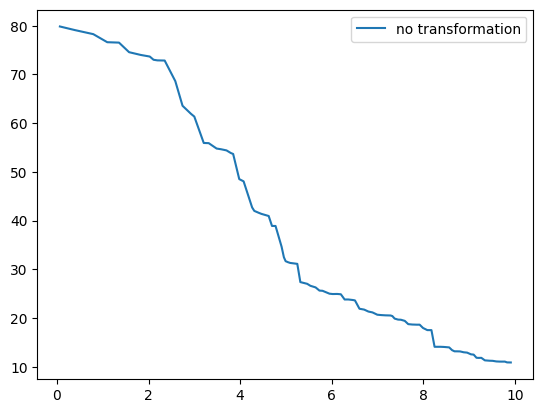

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results[0][0]['times'], results[0][0]['mse'], label = 'no transformation')
plt.legend()

In [ ]:
from src.Mondrian_forest import train
from src.estimate_H import estimate_H_finite_diff
from src.Mondrian_forest import transform_data, two_one_norm
history, w_trees = train(
            X_train, y_train, M, lifetime_max, delta
        )
H_1 = estimate_H_finite_diff(X_train, y_train, M, history, w_trees, step=0.1)
X_train_transformed, X_test_transformed = transform_data(H_1/two_one_norm(H_1), X_train, X_test)

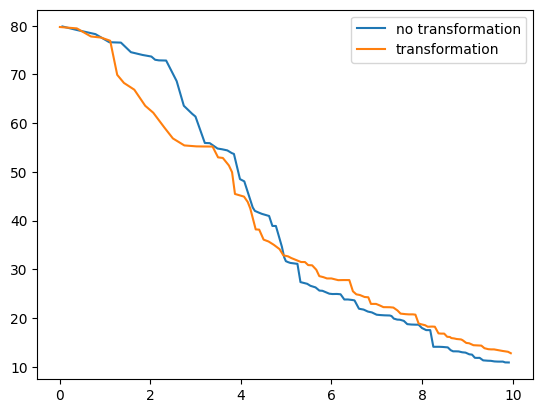

In [ ]:
results.append(
    evaluate_all_lifetimes(X_train_transformed, 
                           y_train, 
                           X_test_transformed, y_test, M, lifetime_max, delta))
plt.plot(results[0][0]['times'], results[0][0]['mse'], label = 'no transformation')
plt.plot(results[1][0]['times'], results[1][0]['mse'], label = 'transformation')
plt.legend()

In [ ]:
import numpy as np
history, w_trees = train(
            X_train_transformed, y_train, M, lifetime_max, delta
        )
H_2 = estimate_H_finite_diff(X_train_transformed, y_train, M, history, w_trees, step=0.1)
X_train_transformed, X_test_transformed = transform_data(H_2 * two_one_norm(H_1) / two_one_norm(np.matmul(H_2, H_1)), X_train_transformed, X_test_transformed)


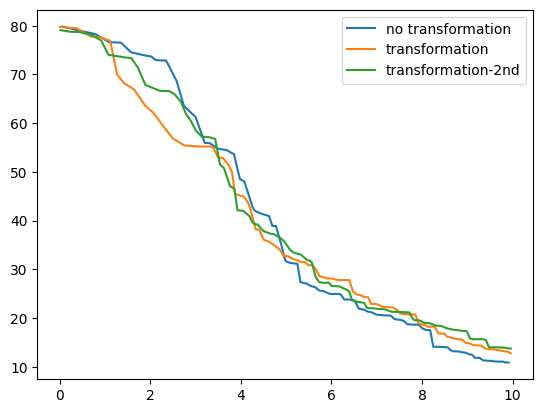

In [ ]:
results.append(
    evaluate_all_lifetimes(X_train_transformed, 
                           y_train, 
                           X_test_transformed, y_test, M, lifetime_max, delta))
plt.plot(results[0][0]['times'], results[0][0]['mse'], label = 'no transformation')
plt.plot(results[1][0]['times'], results[1][0]['mse'], label = 'transformation')
plt.plot(results[2][0]['times'], results[2][0]['mse'], label = 'transformation-2nd')
plt.legend()